In [1]:
import numpy as np
import torch
from helper_functions.helper_functions import NoiseAddition,DataNormalization, Interpolate, RandomHorizontalFlipBscan
from matplotlib import pyplot as plt

In [2]:
train_log=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log.pt')
val_log=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log.pt')

In [3]:
train_log_compact=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log_compact_unet.pt')
val_log_compact=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log_compact_unet.pt')

In [4]:
train_log_big=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log_unet_small_kernel_big_dataset.pt')
val_log_big=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log_unet_small_kernel_big_dataset.pt')

(0.0, 120.0)

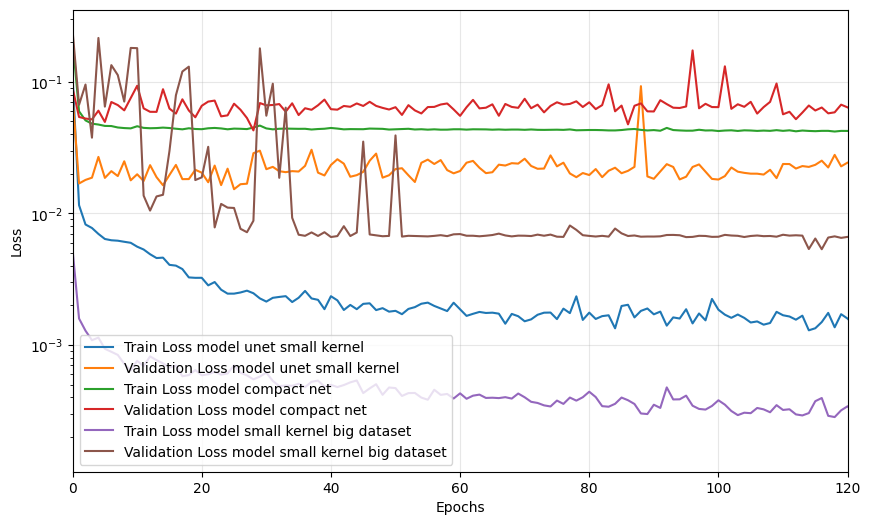

In [8]:
plt.figure(figsize=(10,6))
plt.semilogy(train_log,label='Train Loss model unet small kernel')
plt.semilogy(val_log,label='Validation Loss model unet small kernel')
plt.semilogy(train_log_compact,label='Train Loss model compact net')
plt.semilogy(val_log_compact,label='Validation Loss model compact net')
plt.semilogy(train_log_big,label='Train Loss model small kernel big dataset')
plt.semilogy(val_log_big,label='Validation Loss model small kernel big dataset')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,120)

In [9]:
from torch.utils.data import DataLoader
from helper_functions.helper_functions import RandomHorizontalFlipBscan, NoiseAddition
from data.data_operators import BScanDepthDataset, ComposeBScanTransforms
from networks.Unets import BnetSmallKernel, BnetBigKernel, BnetMean,CompactBnet
from tqdm import tqdm

c:\Users\stone\Temporal_thermal_image\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
test_dataset = BScanDepthDataset(
        bscan_dir=r"E:\Simulated_and_experimental_data\Synthetic_data\B-scans_test\data",
        depth_dir=r"E:\Simulated_and_experimental_data\Synthetic_data\B-scans_test\depth",
        transform=None,
        normalization_path=r"C:\Users\stone\Temporal_thermal_image\normalization_params.npz"
    )

In [11]:
test_loader = DataLoader(test_dataset)

In [19]:
test_iter = iter(test_loader)

sample1 = next(test_iter)
sample2=next(test_iter)
last_batch = None
for last_batch in test_loader:
    pass

In [49]:
model=CompactBnet()
state_dict = torch.load(r"C:\Users\stone\Temporal_thermal_image\Compact_Unet.pth")
model.load_state_dict(state_dict)
model.eval()

CompactBnet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
  (vertical_proj): AdaptiveAvgPool2d(output_size=(1, None))
  (regressor): Sequential(
    (0): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (1): ReLU(inplace=True)
    (2): Conv1d(32,

In [50]:
output=model(last_batch[0])
output.size()

torch.Size([1, 512])

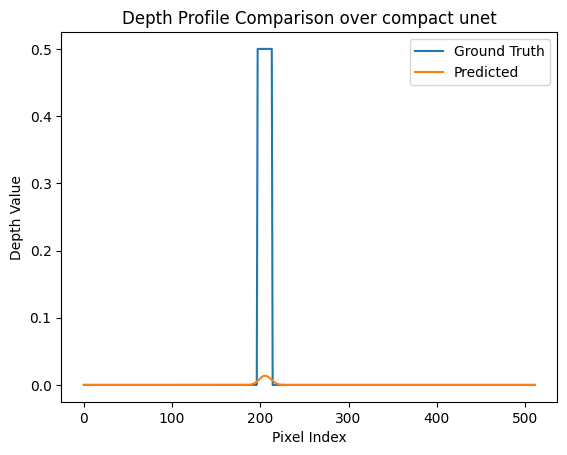

In [51]:
plt.plot(last_batch[1][0].cpu().numpy().flatten(),label='Ground Truth')
plt.plot(output[0].detach().cpu().numpy().flatten(),label='Predicted')
plt.xlabel('Pixel Index') 
plt.ylabel('Depth Value')
plt.title('Depth Profile Comparison over compact unet')
plt.legend()

In [13]:
model=BnetSmallKernel()
state_dict = torch.load(r"C:\Users\stone\Temporal_thermal_image\Unet_small_kernel_l2_both_classes.pth")
model.load_state_dict(state_dict)
model.eval()

BnetSmallKernel(
  (unet): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): 

In [25]:
output=model(last_batch[0])
output.size()

torch.Size([1, 512])

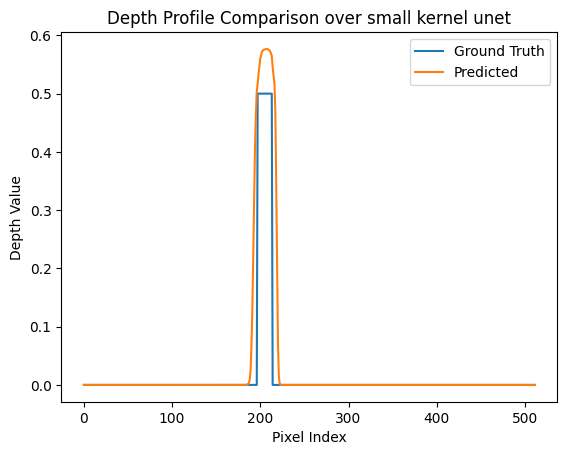

: 

In [ ]:
plt.plot(last_batch[1][0].cpu().numpy().flatten(),label='Ground Truth')
plt.plot(output[0].detach().cpu().numpy().flatten(),label='Predicted')
plt.xlabel('Pixel Index') 
plt.ylabel('Depth Value')
plt.title('Depth Profile Comparison over small kernel unet')
plt.legend()